## 분류용 예제 데이터
### 숫자 필기 이미지 데이터
각 이미지는 0부터 15까지의 명암을 가지는 8x8=64픽셀 해상도의 흑백 이미지이다.
    - Number of Instances: 5620
    - Number of Attributes: 64
    - Attribute Information: 8x8 image of integer pixels in the range 0..16.

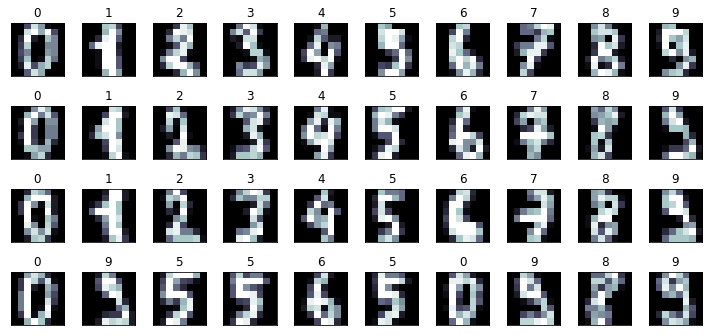

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

digits = load_digits()
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # chi2 val
from sklearn.feature_selection import f_classif # f val
from sklearn.feature_selection import mutual_info_classif # 비모수적 기법

from sklearn.linear_model import LogisticRegression # 분류 모델

x,y=load_digits(return_X_y=True)
x.shape

(1797, 64)

In [3]:
import numpy as np
print(x[:2])
print("-"*80)
print(np.unique(y))

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
--------------------------------------------------------------------------------
[0 1 2 3 4 5 6 7 8 9]


### Chi2

In [69]:
# chi2를 이용하여 k=20 개의 Best Feature 추출
chi2_sb=SelectKBest(score_func=chi2,k=20)
x_chi2=chi2_sb.fit_transform(x,y)
x_chi2.shape

(1797, 20)

In [70]:
x_chi2

array([[ 1.,  0., 15., ...,  6.,  0.,  0.],
       [ 5.,  0.,  9., ...,  0., 10.,  0.],
       [12.,  0., 14., ...,  0., 16.,  9.],
       ...,
       [ 1.,  0.,  2., ...,  2.,  6.,  0.],
       [ 0.,  0., 15., ...,  5., 12.,  0.],
       [ 1.,  0.,  1., ...,  8., 12.,  1.]])

In [71]:
chi_lr_model = LogisticRegression()

In [72]:
# train(0.7), test(0.3) split (seed = 0)
x_chi_train, x_chi_test, y_chi_train, y_chi_test = train_test_split(x_chi2, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [73]:
chi_lr_model.fit(x_chi_train, y_chi_train)

C:\Anaconda\envs\torch36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [74]:
# use the model to make predictions with the test data
y_chi_pred = chi_lr_model.predict(x_chi_test)

# cnt misclass
count_misclassified = (y_chi_test != y_chi_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

# get acc
accuracy = accuracy_score(y_chi_test, y_chi_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 44
Accuracy: 0.92


[[45  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  1  0  2  0  3  0]
 [ 0  5 48  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  1  1  1]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  1  1 53  1  0  0  1]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  2  1  2  2  0 45  1  0]
 [ 0  2  2  1  1  0  2  0 51  2]
 [ 3  0  0  2  0  1  0  0  1 50]]


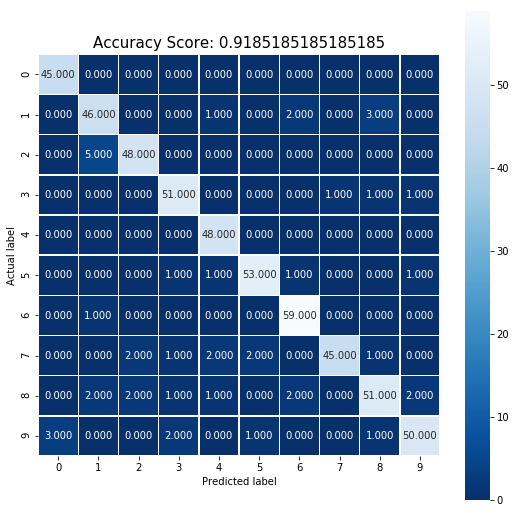

In [75]:
cm_chi = metrics.confusion_matrix(y_chi_test, y_chi_pred)
print(cm_chi)

plt.figure(figsize=(9,9))
sns.heatmap(cm_chi, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [76]:
chi2_selected=chi2_sb.get_support() #어떤 변수가 Select됬는지
chi2_selected = list(chi2_selected)
chi2_selected

[False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False]

In [77]:
chi2_sb.scores_ #chi-val

array([          nan,  811.90700411, 3501.28249552,  698.9252572 ,
        438.52969882, 3879.81925999, 3969.45823205, 1193.5608181 ,
         24.79521396, 2953.83108764, 2583.65198939,  388.24205944,
        824.69094853, 3676.48924765, 1983.5796061 ,  597.24198237,
          8.95886124, 1924.21690377, 2409.27140681, 3556.31594594,
       4871.94194551, 4782.19921618, 2155.17378998,  376.76583333,
          7.90090158, 2471.82418401, 4515.48149826, 2986.64314847,
       3724.09567634, 3208.64686641, 5138.07412439,   35.71270718,
                 nan, 5688.25079535, 5262.46646904, 3165.0605867 ,
       3231.63943369, 2532.99695611, 3288.81403655,           nan,
        142.85082873, 3863.85787901, 6416.0867248 , 5448.25154235,
       4079.73153383, 2134.02540236, 4486.34097862,  313.53898127,
         70.39927392,  449.72327313, 2801.97224468, 1527.54519627,
       1653.15892311, 3073.99803898, 5251.21748723,  683.88227339,
          9.15254237,  851.06791492, 3800.2473108 ,  730.92975

In [78]:
chi2_sb.pvalues_ #p-val

array([            nan, 5.81310493e-169, 0.00000000e+000, 1.17740541e-144,
       8.11314242e-089, 0.00000000e+000, 0.00000000e+000, 2.97727113e-251,
       3.20626273e-003, 0.00000000e+000, 0.00000000e+000, 4.41344943e-078,
       1.02825052e-171, 0.00000000e+000, 0.00000000e+000, 8.18335060e-123,
       4.41080315e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.23435651e-075,
       5.44163062e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.45801029e-005,
                   nan, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000,             nan,
       2.65875300e-026, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.49452723e-062,
       1.27145348e-011, 3.28604761e-091, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

### f_classif

In [79]:
# f_classif를 이용하여 k=20 개의 Best Feature 추출
sb_f_classif=SelectKBest(score_func=f_classif,k=20)
x_f_classif=sb_f_classif.fit_transform(x,y)
x_f_classif.shape

C:\Anaconda\envs\torch36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
C:\Anaconda\envs\torch36\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(1797, 20)

In [80]:
x_f_classif

array([[ 5., 13., 15., ...,  6., 10.,  0.],
       [ 0.,  0.,  9., ...,  0., 16., 10.],
       [ 0.,  3., 14., ...,  0., 11., 16.],
       ...,
       [ 1., 13.,  2., ...,  2., 13.,  6.],
       [ 2., 14., 15., ...,  5., 16., 12.],
       [10., 16.,  1., ...,  8., 14., 12.]])

In [81]:
f_lr_model = LogisticRegression()

In [82]:
# train(0.7), test(0.3) split (seed = 0)
x_f_train, x_f_test, y_f_train, y_f_test = train_test_split(x_f_classif, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [83]:
print(x_f_train);print(x_f_test); print(y_f_train);print(y_f_test)

[[ 0. 13. 12. ...  1.  2.  0.]
 [ 7. 16.  8. ...  7. 16. 16.]
 [ 0.  1.  2. ...  0. 14. 12.]
 ...
 [ 5. 16.  7. ...  9.  0.  0.]
 [ 4. 13. 16. ...  6.  4.  0.]
 [ 6. 16. 15. ...  5. 16. 11.]]
[[11. 16. 13. ... 13.  8. 13.]
 [15. 14.  3. ... 15. 12.  1.]
 [13. 15.  2. ... 13. 16. 16.]
 ...
 [ 0. 11.  0. ...  0. 16. 15.]
 [ 8. 10.  3. ... 10.  8.  2.]
 [ 1. 13. 16. ...  3. 16. 11.]]
[9 3 6 ... 7 7 8]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 

In [84]:
f_lr_model.fit(x_f_train, y_f_train)

C:\Anaconda\envs\torch36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [85]:
# use the model to make predictions with the test data
y_f_pred = f_lr_model.predict(x_f_test)

# cnt misclass
count_misclassified = (y_f_test != y_f_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

# get acc
accuracy = accuracy_score(y_f_test, y_f_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 57
Accuracy: 0.89


[[44  0  0  0  0  0  1  0  0  0]
 [ 0 45  1  0  0  0  4  0  2  0]
 [ 0  2 48  1  0  0  0  0  2  0]
 [ 0  2  2 46  0  1  0  0  1  2]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  1  1 49  1  0  0  5]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  2  1  1  5  0  0 43  0  1]
 [ 0  4  2  0  0  1  2  2 49  1]
 [ 1  0  2  0  1  0  0  1  0 52]]


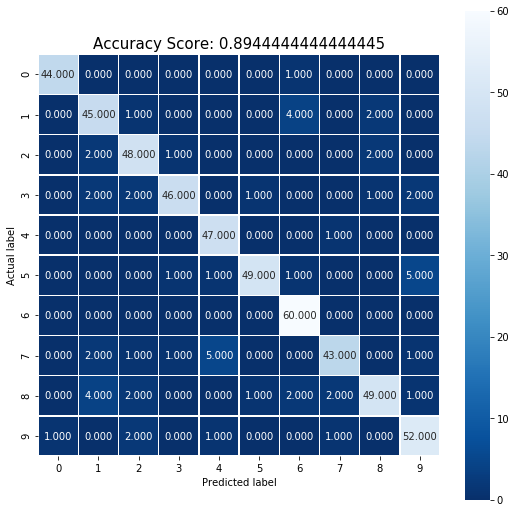

In [86]:
cm_f = metrics.confusion_matrix(y_f_test, y_f_pred)
print(cm_f)

plt.figure(figsize=(9,9))
sns.heatmap(cm_f, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [87]:
f_classif_selected=sb_f_classif.get_support() #어떤 변수가 Select됬는지
f_classif_selected = list(f_classif_selected)
f_classif_selected

[False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False]

In [88]:
sb_f_classif.scores_ #f-val

array([         nan,  39.77670877, 161.66962131,  68.01284271,
        37.085693  , 126.41541048,  74.26391138,  17.28204084,
         1.73328376,  93.87300085, 205.13348801,  38.86089592,
        51.62522088, 166.97247543,  37.41350206,  10.97417161,
         0.71100904,  55.32842977, 138.10227535, 138.68433936,
       202.43528942, 234.21960737,  50.24960622,  11.47100745,
         0.87782927, 103.80241354, 293.09983163, 146.07649117,
       236.7444881 , 127.5841692 , 189.18278073,   4.03517196,
                nan, 312.78489658, 254.37524393, 136.20370677,
       220.78357776, 110.63540569, 147.22496837,          nan,
         6.90281305, 123.36344683, 268.76998164, 222.53295915,
       159.07418303,  85.78384611, 169.33840921,  10.53627776,
         1.35922709,  12.19342228, 115.41402772,  83.87060144,
        88.50634019, 139.19382977, 162.49090456,  17.53002847,
         1.01703597,  35.49323239, 163.49692878,  68.70759521,
       200.35796882, 178.71033228, 106.03150882,  30.67

### mutual_info_classif

In [89]:
# mutual_info_classif를 이용하여 k=20 개의 Best Feature 추출
sb_mutual_info_classif=SelectKBest(score_func=mutual_info_classif,k=20)
x_mutual_info_classif=sb_mutual_info_classif.fit_transform(x,y)
x_mutual_info_classif.shape

(1797, 20)

In [90]:
x_mutual_info_classif

array([[ 5., 13., 15., ...,  0.,  6.,  0.],
       [ 0.,  0.,  9., ...,  0.,  0., 10.],
       [ 0.,  3., 14., ...,  5.,  0., 16.],
       ...,
       [ 1., 13.,  2., ...,  0.,  2.,  6.],
       [ 2., 14., 15., ...,  2.,  5., 12.],
       [10., 16.,  1., ...,  8.,  8., 12.]])

In [91]:
mic_lr_model = LogisticRegression()

In [92]:
# train(0.7), test(0.3) split (seed = 0)
x_mic_train, x_mic_test, y_mic_train, y_mic_test = train_test_split(x_mutual_info_classif, y, train_size = 0.7, test_size = 0.3, random_state = 0)

In [93]:
print(x_mic_train);print(x_mic_test); print(y_mic_train);print(y_mic_test)

[[ 0. 13. 12. ...  0.  1.  0.]
 [ 7. 16.  8. ... 14.  7. 16.]
 [ 0.  1.  2. ... 15.  0. 12.]
 ...
 [ 5. 16.  7. ...  0.  9.  0.]
 [ 4. 13. 16. ...  0.  6.  0.]
 [ 6. 16. 15. ...  1.  5. 11.]]
[[11. 16. 13. ...  1. 13. 13.]
 [15. 14.  3. ...  0. 15.  1.]
 [13. 15.  2. ...  6. 13. 16.]
 ...
 [ 0. 11.  0. ...  2.  0. 15.]
 [ 8. 10.  3. ...  3. 10.  2.]
 [ 1. 13. 16. ...  4.  3. 11.]]
[9 3 6 ... 7 7 8]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 

In [94]:
mic_lr_model.fit(x_mic_train, y_mic_train)

C:\Anaconda\envs\torch36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [95]:
# use the model to make predictions with the test data
y_mic_pred = mic_lr_model.predict(x_mic_test)

# cnt misclass
count_misclassified = (y_mic_test != y_mic_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

# get acc
accuracy = accuracy_score(y_mic_test, y_mic_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 58
Accuracy: 0.89


[[44  0  0  0  0  0  1  0  0  0]
 [ 0 43  1  2  1  0  3  0  1  1]
 [ 0  2 48  3  0  0  0  0  0  0]
 [ 0  0  3 45  0  1  0  0  1  4]
 [ 0  0  0  0 45  0  2  1  0  0]
 [ 0  0  0  2  1 51  2  0  0  1]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 1  1  0  1  3  0  0 47  0  0]
 [ 0  2  1  2  0  2  2  3 49  0]
 [ 1  0  2  1  1  0  0  1  0 51]]


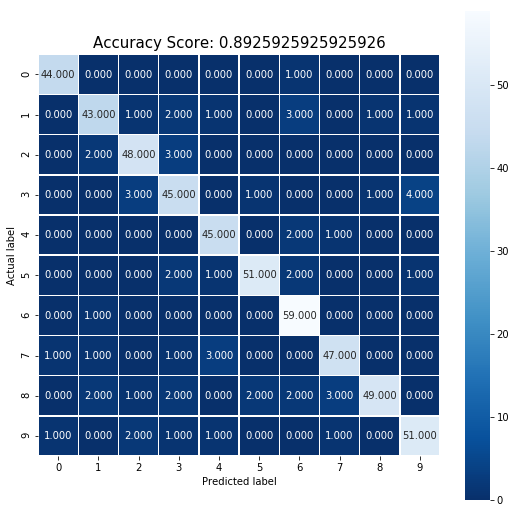

In [96]:
cm_mic = metrics.confusion_matrix(y_mic_test, y_mic_pred)
print(cm_mic)

plt.figure(figsize=(9,9))
sns.heatmap(cm_mic, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [97]:
mutual_info_classif_selected = sb_mutual_info_classif.get_support() #어떤 변수가 Select됬는지
mutual_info_classif_selected = list(mutual_info_classif_selected)
mutual_info_classif_selected

[False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False]

In [98]:
sb_mutual_info_classif.scores_ #sb_mutual_info_classif

array([0.        , 0.13260211, 0.3407797 , 0.20961374, 0.139801  ,
       0.24801373, 0.18928305, 0.03384059, 0.00364504, 0.24129415,
       0.33911565, 0.11502485, 0.20560095, 0.34989929, 0.1241675 ,
       0.03634267, 0.00962434, 0.19892263, 0.2609373 , 0.24363816,
       0.38982451, 0.43298475, 0.20616256, 0.00466439, 0.        ,
       0.23151515, 0.42408644, 0.28600751, 0.39235673, 0.31861681,
       0.37749557, 0.01242716, 0.01679329, 0.41874338, 0.43781104,
       0.32329926, 0.38410537, 0.23411993, 0.3638426 , 0.        ,
       0.        , 0.27459192, 0.44234429, 0.41187306, 0.28844319,
       0.19782039, 0.30438443, 0.0202063 , 0.        , 0.03046968,
       0.29013606, 0.21897829, 0.20931306, 0.31702407, 0.40891492,
       0.06451437, 0.00498071, 0.12930443, 0.38194189, 0.19640177,
       0.31189039, 0.396757  , 0.28686654, 0.09574037])

### Comparison

In [103]:
import pandas as pd
comp_df=pd.DataFrame({ 'chi2': chi2_selected,
                       'f_classif' :f_classif_selected,
                       'mutual_info_classif' : mutual_info_classif_selected })
comp_df.head()

,chi2,f_classif,mutual_info_classif
0,False,False,False
1,False,False,False
2,False,True,True
3,False,False,False
4,False,False,False


In [104]:
comp_df.to_csv('model_comparison.csv')

### PCA

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px

md1=make_pipeline(SelectKBest(k=30),PCA(n_components=3))
x_new=md1.fit_transform(x,y)

In [ ]:
df1=pd.DataFrame({'X':x_new[:,0],'Y':x_new[:,1],'Z':x_new[:,2],'C':y})
df1.head()

In [ ]:
fig=px.scatter_3d(df1,x='X',y='Y',z='Z',color='C')
fig.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import KernelPCA
import pandas as pd
import plotly.express as px
md2=make_pipeline(SelectKBest(k=30),KernelPCA(kernel='rbf',n_components=6))
x_new2=md2.fit_transform(x,y)

In [ ]:
df2=pd.DataFrame({'X':x_new2[:,0],'Y':x_new2[:,1],'Z':x_new2[:,2],'C':y})
df2.head()

In [ ]:
fig=px.scatter_3d(df2,x='X',y='Y',z='Z',color='C')
fig.show()

In [ ]:
df3=pd.DataFrame({'X':x_new2[:,3],'Y':x_new2[:,4],'Z':x_new2[:,5],'C':y})
df3.head()

In [ ]:
fig=px.scatter_3d(df3,x='X',y='Y',z='Z',color='C')
fig.show()

### IRIS 데이터

In [ ]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.scatter_3d(iris,x='sepal_length',y='sepal_width',z='petal_length',color='species')
fig.show()

In [ ]:
import numpy as np
y=np.asarray(iris.species)
x=np.asarray(iris.drop('species',axis=1))
x.shape

In [ ]:
sb1=SelectKBest(k=3)
x_new=sb1.fit_transform(x,y)

In [ ]:
fig=px.scatter_3d(iris,x=x_new[:,0],y=x_new[:,1],z=x_new[:,2],color=y)
fig.show()